In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np

In [3]:
# #############################################################################
%matplotlib inline
import matplotlib.pyplot as plt

# Sythetic data

## ToDos

1. General 
    1. rename "bumps" as "stays" and "slopes" as "travels"
    2. make it easier to have beginning and end points be different
        * start somewhere, but end somewhere else
    3. make it automatic to find regions and add individual noise amplitudes to them
        1. use to validate the algo. via labeling and training
        2. add individual noise to stays to make them location- and stay-specific
            * make same noise for stays at same $x$?
    4. include a type selector for trajectory with top-hat or smooth bumps
2. Top-hat bumps
    1. include a slope limit which prevents a slope from taking more than half of a bump
    2. include pre- and post-bump slopes
        1. include option for these to be identical
    3. extend to multiple bumps
        1. generalize slopes between bumps $\to$ use average slope?
3. Smooth bumps
    1. make it more intuitive
    2. match the top-hat bump methodology

    


## Top-hat bumps

(array([500]),)
500
0


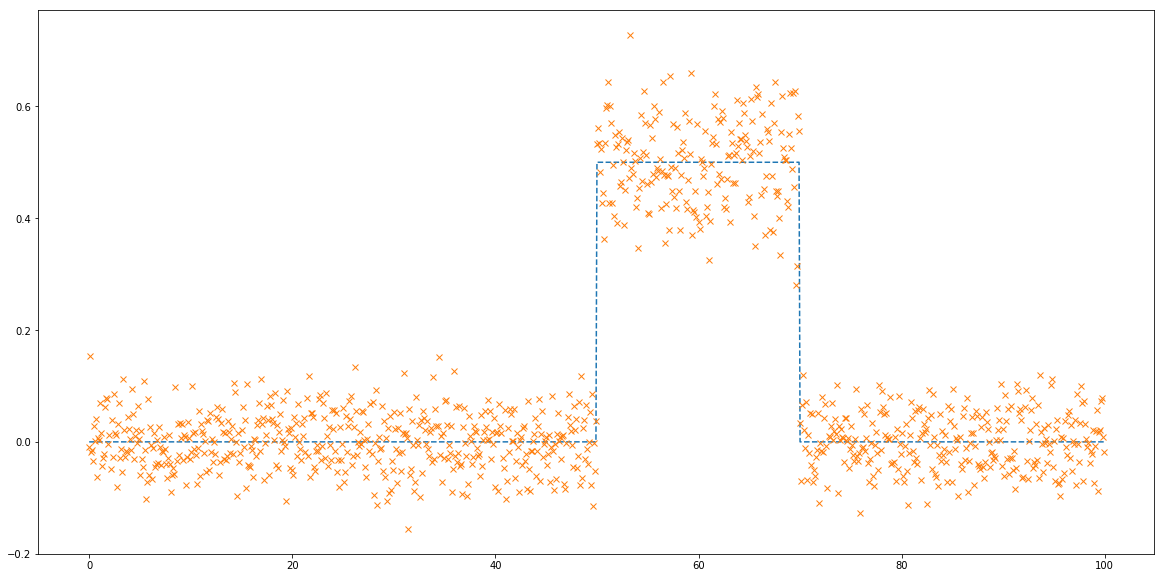

In [137]:
importlib.reload(synthetic_data);
from stay_classification.synthetic_data import get_1bump, get_bumps, get_noisy_bumps, get_noise

connect = 70
dc = {
        "bump1_amp":  0.5, "bump1_slope": 0.95, "bump1_slope_out": 0.95, "bump1_start": 50 , "bump1_end": connect
     }


bump1_amp   = dc['bump1_amp']
bump1_slope = dc['bump1_slope']
bump1_slope_out = dc['bump1_slope_out']
bump1_start = dc['bump1_start']
bump1_end   = dc['bump1_end']

yyy = 0*xxx
print(np.where(xxx==bump1_start))
bump1_start_ind = np.where((xxx>=bump1_start))[0][0]
print(bump1_start_ind)
bump1_end_ind = np.where((xxx<bump1_end))[0][0]
print(bump1_end_ind)

bump1_mask = np.where((xxx>=bump1_start) & (xxx<bump1_end))
yyy[bump1_mask] = bump1_amp



yyy0 = yyy.copy()
dc_noise = {"bump1_eta": 0.015, "bump2_eta": 0.125}

#yyy = get_1bump(xxx, **dc)
dc.update(dc_noise)
yyyn = get_noise(yyy)

plt.figure(figsize=(20,10))
plt.plot(xxx, yyy, '--')
plt.plot(xxx, yyyn, 'x')

In [120]:
get_x0 = lambda m,x,y,y0: x-((y-y0)/m)

0.5 0.0
69.85 0.25
64.85 74.85


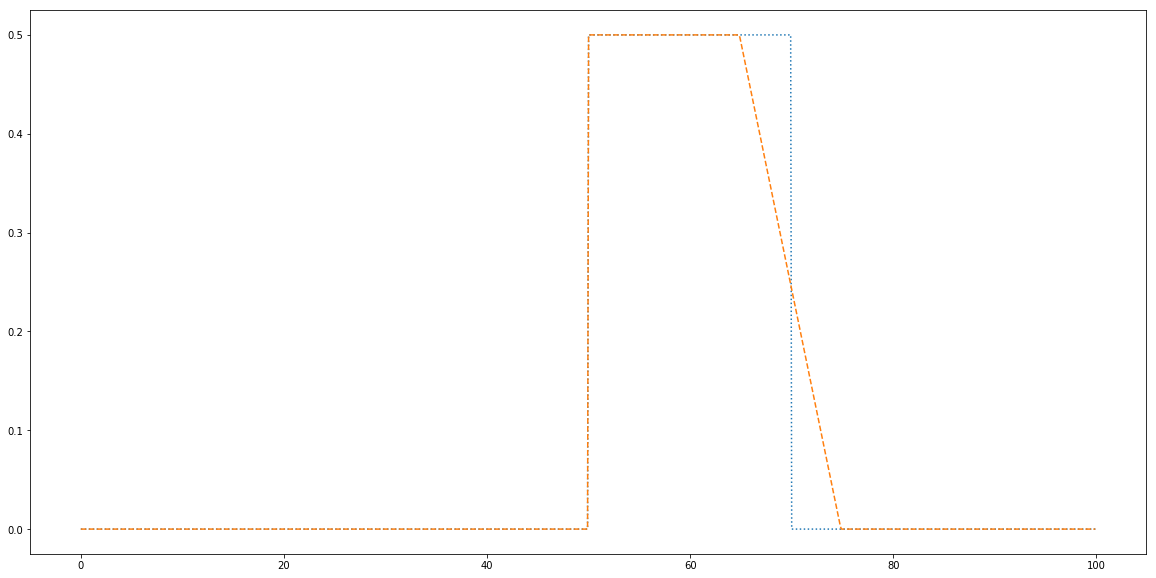

In [193]:
yyy = yyy0.copy()

# Get the pre- & post-step indices
bump1_start_ind = bump1_mask[0][0]
bump1_end_ind = bump1_mask[0][-1]

# Get the midpoint values within the step
ymid_start = np.mean(yyy[bump1_start_ind-1:bump1_start_ind+1])
xmid_start = np.mean(xxx[bump1_start_ind-1:bump1_start_ind+1])

# Get the pre- & post-step amplitudes
y0_end_end = yyy[bump1_end_ind:bump1_end_ind+2][-1]
y0_end_start = yyy[bump1_end_ind-1:bump1_end_ind][-1]

# Get the midpoint values within the step
ymid_end = np.mean(yyy[bump1_end_ind:bump1_end_ind+2])
xmid_end = np.mean(xxx[bump1_end_ind-1:bump1_end_ind+1])

print(y0_end_start, y0_end_end)
print(xmid_end, ymid_end)


'''    
# Get the x-locations for the start and end of the sloped region
x0_start_end = get_x0(bump1_slope, xmid_start, ymid_start, y0_start_end)
x0_start_start = get_x0(bump1_slope, xmid_start, ymid_start, y0_start_start)
bump1_slope_mask = np.where((xxx>=x0_start_start) & (xxx<x0_start_end))

# Compute the sloped region
yyy[bump1_slope_mask] = bump1_slope*(xxx[bump1_slope_mask]-x0_start_start) + y0_start_start'''

# Get the x-locations for the start and end of the sloped region
x0_end_start = get_x0(bump1_slope, xmid_end, ymid_end, y0_end_start)
x0_end_end   = get_x0(bump1_slope, xmid_end, ymid_end, y0_end_end)
bump1_slope_mask = np.where((xxx>=x0_end_start) & (xxx<x0_end_end))

# Compute the sloped region
yyy[bump1_slope_mask] = bump1_slope*(xxx[bump1_slope_mask]-x0_end_start) + y0_end_start

print(x0_end_start, x0_end_end)

plt.figure(figsize=(20,10))
plt.plot(xxx, yyy0, ':', label=r'$y_0(x)$')

# plot
plt.plot(xxx, yyy, '--', label=f'slope = {bump1_slope}')

In [182]:
# Get the pre- & post-step amplitudes
y0_end_end = yyy[bump1_end_ind:bump1_end_ind+2][-1]
y0_end_start = yyy[bump1_end_ind-1:bump1_end_ind][-1]

# Get the midpoint values within the step
ymid_end = np.mean(yyy[bump1_end_ind:bump1_end_ind+2])
xmid_end = np.mean(xxx[bump1_end_ind-1:bump1_end_ind+1])

print(y0_end_start, y0_end_end)
print(xmid_end, ymid_end)

0.5 0.0
69.85 0.25


In [161]:
xmid_end, ymid_end

(69.85, 0.5)

In [186]:

'''    
# Get the x-locations for the start and end of the sloped region
x0_start_end = get_x0(bump1_slope, xmid_start, ymid_start, y0_start_end)
x0_start_start = get_x0(bump1_slope, xmid_start, ymid_start, y0_start_start)
bump1_slope_mask = np.where((xxx>=x0_start_start) & (xxx<x0_start_end))

# Compute the sloped region
yyy[bump1_slope_mask] = bump1_slope*(xxx[bump1_slope_mask]-x0_start_start) + y0_start_start'''

# Get the x-locations for the start and end of the sloped region
x0_end_start = get_x0(bump1_slope, xmid_end, ymid_end, y0_end_start)
x0_end_end   = get_x0(bump1_slope, xmid_end, ymid_end, y0_end_end)
bump1_slope_mask = np.where((xxx>=x0_end_start) & (xxx<x0_end_end))

# Compute the sloped region
yyy[bump1_slope_mask] = bump1_slope*(xxx[bump1_slope_mask]-x0_end_start) + y0_end_start

In [187]:
(x0_end_start, x0_end_end)

(74.85, 64.85)

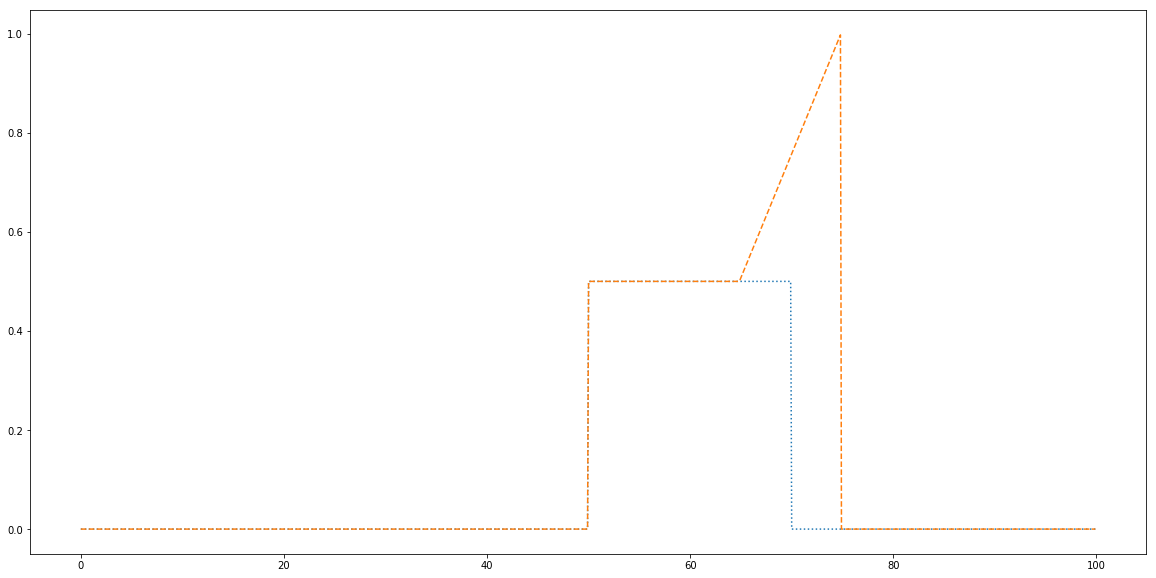

In [188]:
plt.figure(figsize=(20,10))
plt.plot(xxx, yyy0, ':', label=r'$y_0(x)$')

# plot
plt.plot(xxx, yyy, '--', label=f'slope = {bump1_slope}')

In [ ]:
# Make a copy for each plot
yyy = yyy0.copy()

# Get the pre- & post-step indices
bump1_start_ind = bump1_mask[0][0]
bump1_end_ind = bump1_mask[0][-1]

# Get the midpoint values within the step
ymid_start = np.mean(yyy[bump1_start_ind-1:bump1_start_ind+1])
xmid_start = np.mean(xxx[bump1_start_ind-1:bump1_start_ind+1])

# Get the pre- & post-step amplitudes
y0_end_end = yyy[bump1_end_ind:bump1_end_ind+2][-1]
y0_end_start = yyy[bump1_end_ind-1:bump1_end_ind][-1]

# Get the midpoint values within the step
ymid_end = np.mean(yyy[bump1_end_ind:bump1_end_ind+2])
xmid_end = np.mean(xxx[bump1_end_ind-1:bump1_end_ind+1])


plt.figure(figsize=(20,10))
plt.plot(xxx, yyy0, ':', label=r'$y_0(x)$')

for bump1_slope in np.array([50, 10, 5, 1, 0.5, 0.1, 0.05]):
    
    
    # Get the x-locations for the start and end of the sloped region
    x0_start_end = get_x0(bump1_slope, xmid_start, ymid_start, y0_start_end)
    x0_start_start = get_x0(bump1_slope, xmid_start, ymid_start, y0_start_start)
    bump1_slope_mask = np.where((xxx>=x0_start_start) & (xxx<x0_start_end))
    
    # Compute the sloped region
    yyy[bump1_slope_mask] = bump1_slope*(xxx[bump1_slope_mask]-x0_start_start) + y0_start_start
    
    # Get the x-locations for the start and end of the sloped region
    x0_end_start = get_x0(-bump1_slope, xmid_end, ymid_end, y0_end_start)
    x0_end_end   = get_x0(-bump1_slope, xmid_end, ymid_end, y0_end_end)
    bump1_slope_mask = np.where((xxx>=x0_end_start) & (xxx<x0_end_end))

    # Compute the sloped region
    yyy[bump1_slope_mask] = -bump1_slope*(xxx[bump1_slope_mask]-x0_end_start) + y0_end_start
    
    # plot
    plt.plot(xxx, yyy, '--', label=f'slope = {bump1_slope}')

plt.legend();

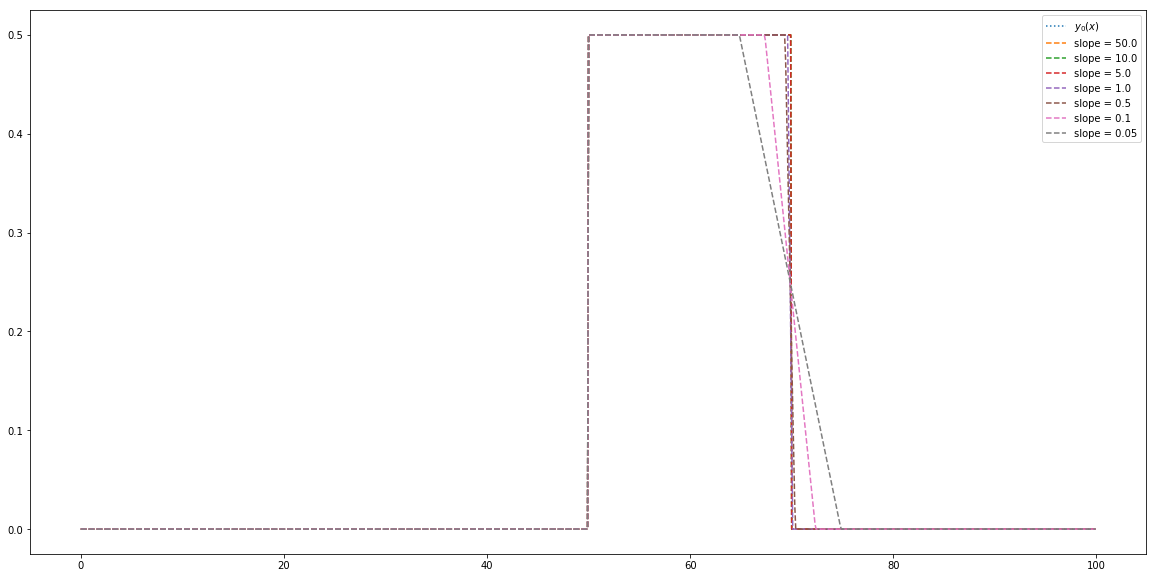

In [195]:
plt.figure(figsize=(20,10))
plt.plot(xxx, yyy0, ':', label=r'$y_0(x)$')

for bump1_slope in np.array([50, 10, 5, 1, 0.5, 0.1, 0.05]):
    
    # Make a copy for each plot
    yyy = yyy0.copy()

    '''    
    # Get the x-locations for the start and end of the sloped region
    x0_start_end = get_x0(bump1_slope, xmid_start, ymid_start, y0_start_end)
    x0_start_start = get_x0(bump1_slope, xmid_start, ymid_start, y0_start_start)
    bump1_slope_mask = np.where((xxx>=x0_start_start) & (xxx<x0_start_end))
    
    # Compute the sloped region
    yyy[bump1_slope_mask] = bump1_slope*(xxx[bump1_slope_mask]-x0_start_start) + y0_start_start'''

    # Get the x-locations for the start and end of the sloped region
    x0_end_start = get_x0(-bump1_slope, xmid_end, ymid_end, y0_end_end)
    x0_end_end = get_x0(-bump1_slope, xmid_end, ymid_end, y0_end_start)
    bump1_slope_mask = np.where((xxx>=x0_end_start) & (xxx<x0_end_end))
    
    # Compute the sloped region
    yyy[bump1_slope_mask] = bump1_slope*(xxx[bump1_slope_mask]-x0_end_start) + y0_end_start
    
    
    # plot
    plt.plot(xxx, yyy, '--', label=f'slope = {bump1_slope}')

plt.legend();

## Smooth bumps

In [4]:
import importlib
from stay_classification import synthetic_data

In [175]:
yyy[bump1_slope_mask]

array([0.5025, 0.5075, 0.5125, 0.5175, 0.5225, 0.5275, 0.5325, 0.5375,
       0.5425, 0.5475, 0.5525, 0.5575, 0.5625, 0.5675, 0.5725, 0.5775,
       0.5825, 0.5875, 0.5925, 0.5975, 0.6025, 0.6075, 0.6125, 0.6175,
       0.6225, 0.6275, 0.6325, 0.6375, 0.6425, 0.6475, 0.6525, 0.6575,
       0.6625, 0.6675, 0.6725, 0.6775, 0.6825, 0.6875, 0.6925, 0.6975,
       0.7025, 0.7075, 0.7125, 0.7175, 0.7225, 0.7275, 0.7325, 0.7375,
       0.7425, 0.7475, 0.7525, 0.7575, 0.7625, 0.7675, 0.7725, 0.7775,
       0.7825, 0.7875, 0.7925, 0.7975, 0.8025, 0.8075, 0.8125, 0.8175,
       0.8225, 0.8275, 0.8325, 0.8375, 0.8425, 0.8475, 0.8525, 0.8575,
       0.8625, 0.8675, 0.8725, 0.8775, 0.8825, 0.8875, 0.8925, 0.8975,
       0.9025, 0.9075, 0.9125, 0.9175, 0.9225, 0.9275, 0.9325, 0.9375,
       0.9425, 0.9475, 0.9525, 0.9575, 0.9625, 0.9675, 0.9725, 0.9775,
       0.9825, 0.9875, 0.9925, 0.9975])

In [5]:
xxx = np.arange(0,100,0.1)

In [6]:
importlib.reload(synthetic_data);
from stay_classification.synthetic_data import get_1bump, get_bumps, get_noisy_bumps

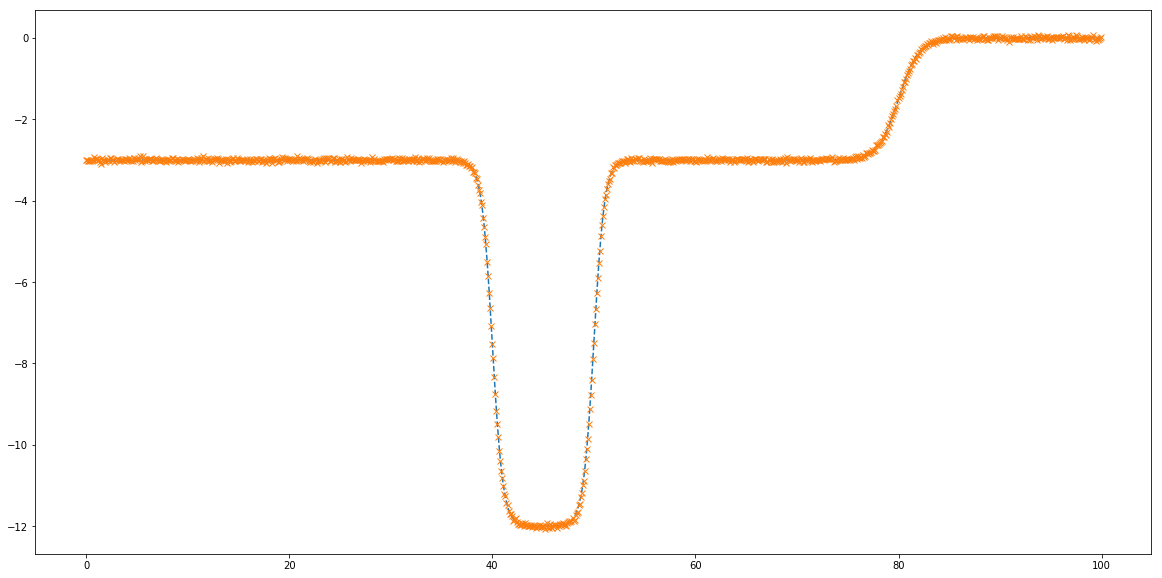

In [7]:
dc = {
        "bump1_amp":  -1.5, "bump1_slope": 0.5, "bump1_start": -20 , "bump1_end": 80,
        "bump2_amp": -4.5, "bump2_slope": 0.95, "bump2_start": 40 , "bump2_end": 50
     }

dc_noise = {"bump1_eta": 0.015, "bump2_eta": 0.025}

yyy = get_bumps(xxx, **dc)
dc.update(dc_noise)
yyyn = get_noisy_bumps(xxx, **dc)

plt.figure(figsize=(20,10))
plt.plot(xxx, yyy, '--')
plt.plot(xxx, yyyn, 'x')

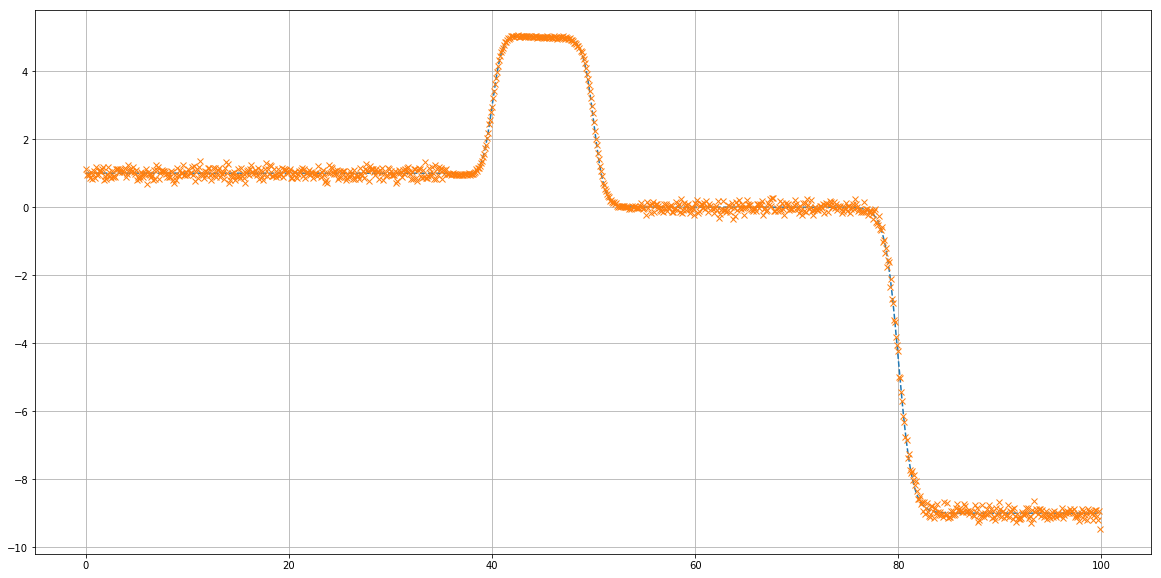

In [8]:
dc = {
        "bump1_amp":  0.5, "bump1_slope": 0.5, "bump1_start": -20 , "bump1_end": 40,
        "bump2_amp":  2.5, "bump2_slope": 0.95, "bump2_start": 40 , "bump2_end": 50,
        "bump3_amp": -4.5, "bump3_slope": 0.75, "bump3_start": 80 , "bump3_end": 150
     }

dc_noise = {"bump1_eta": 0.015, "bump2_eta": 0.125, "bump3_eta": 0.015}

yyy = get_bumps(xxx, **dc)
dc.update(dc_noise)
yyyn = get_noisy_bumps(xxx, **dc)

plt.figure(figsize=(20,10))
plt.plot(xxx, yyy, '--')
plt.plot(xxx, yyyn, 'x')
plt.grid()

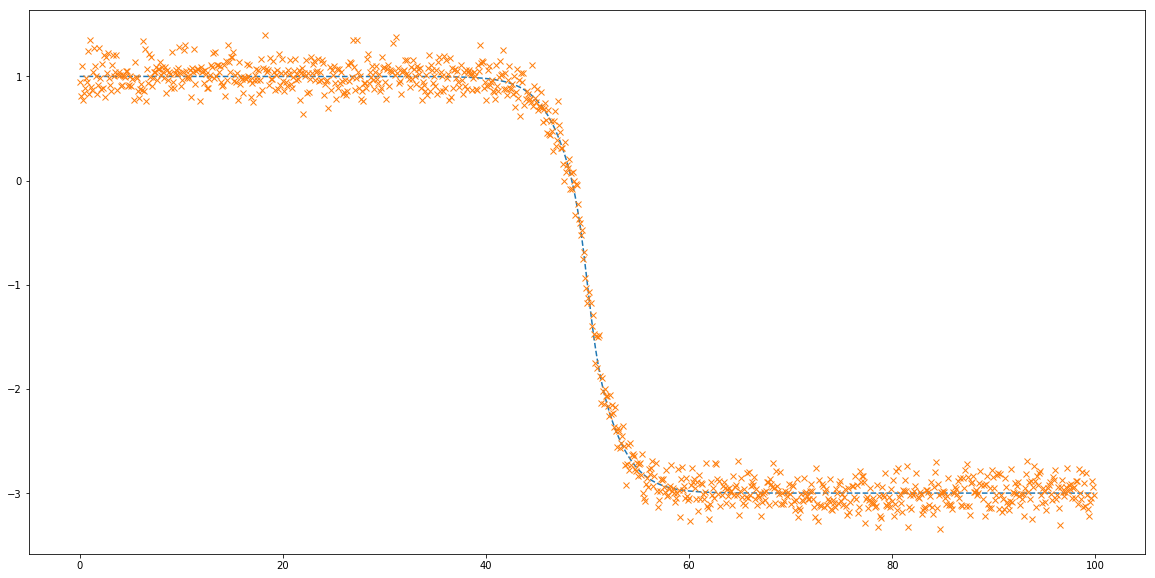

In [9]:
connect = 50
dc = {
        "bump1_amp":  0.5, "bump1_slope": 0.95, "bump1_start": -150 , "bump1_end": connect,
        "bump2_amp": -1.5, "bump2_slope": 0.25, "bump2_start": connect , "bump2_end": 150
     }

dc_noise = {"bump1_eta": 0.015, "bump2_eta": 0.125}

yyy = get_bumps(xxx, **dc)
dc.update(dc_noise)
yyyn = get_noisy_bumps(xxx, **dc)

plt.figure(figsize=(20,10))
plt.plot(xxx, yyy, '--')
plt.plot(xxx, yyyn, 'x')

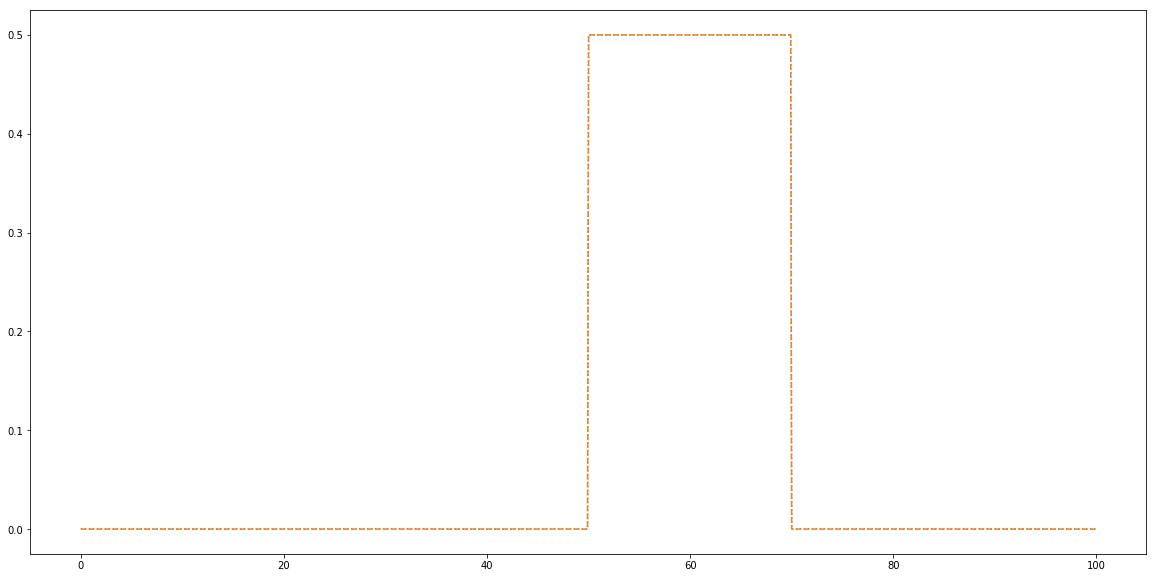

In [124]:
plt.figure(figsize=(20,10))
plt.plot(xxx, yyy0, ':')
plt.plot(xxx, yyy, '--')
#plt.plot(xxx, yyyn, 'x')